<a href="https://colab.research.google.com/github/kaiovalente/ds-portifolio-robos/blob/master/Correlacao_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análise de portfólio de estratégias automatizadas de robôs investidores

Neste estudo será analisado o resultado de 3 estratégias diferentes operando durante o ano de 2019 em mini contratos futuros do indice Bovespa na bolsa B3. Todas as estratégias são operações de daytrade, operações que começam e terminam no mesmo dia.

Entre as 3 estratégias analisadas, uma realiza operações contra tendência, uma a favor da tendência e outra faz scalps - operações curtas e rápidas.

Ao fim, será gerada uma curva de capital do portfólio para exemplificar as vantagens de se utilizar a teoria de portfólios para diversificação e diminuição de risco.


##Carregando dados

Em todos os dataframes as informações são as mesmas. Data e saldo final do respectivo dia. Todos os robôs começaram suas operações com um capital de R$ 5000

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

%matplotlib inline

df_ct = pd.read_csv('https://raw.githubusercontent.com/kaiovalente/ds-portifolio-robos/master/contratendencia_normalizado.csv', encoding = "ISO-8859-1", sep=';')
df_ct.head()

,<BALANCE>,Data
0,5000.0,2019-01-01
1,4914.0,2019-01-02
2,5230.0,2019-01-03
3,5438.0,2019-01-04
4,5393.0,2019-01-07


In [5]:
df_trend = pd.read_csv('https://raw.githubusercontent.com/kaiovalente/ds-portifolio-robos/master/trend_normalizado.csv', encoding = "ISO-8859-1", sep=';')
df_trend.head()

,<BALANCE>,Data
0,5000.0,2019-01-01
1,5017.0,2019-01-02
2,5212.0,2019-01-03
3,5240.0,2019-01-04
4,4916.0,2019-01-07


In [6]:
df_scalper = pd.read_csv('https://raw.githubusercontent.com/kaiovalente/ds-portifolio-robos/master/scalper_normalizado.csv', encoding = "ISO-8859-1", sep=',')
df_scalper.head()

,<BALANCE>,Data
0,5000.0,2019-01-01
1,5094.0,2019-01-02
2,5031.0,2019-01-03
3,5015.0,2019-01-04
4,5025.0,2019-01-07


## Curva de Capital da estratégia que opera contra tendência

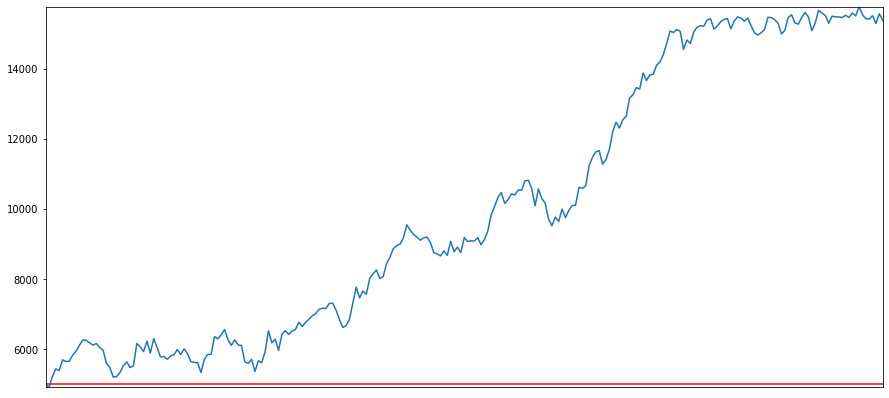

In [7]:
plt.figure(figsize=(15,7))
plt.axhline(y=5000, color='red')
plt.xticks([])
plt.autoscale(tight=True)
plt.plot(df_ct['Data'], df_ct['<BALANCE>'] )
plt.show();

## Curva de Capital da estratégia que opera a favor da tendência

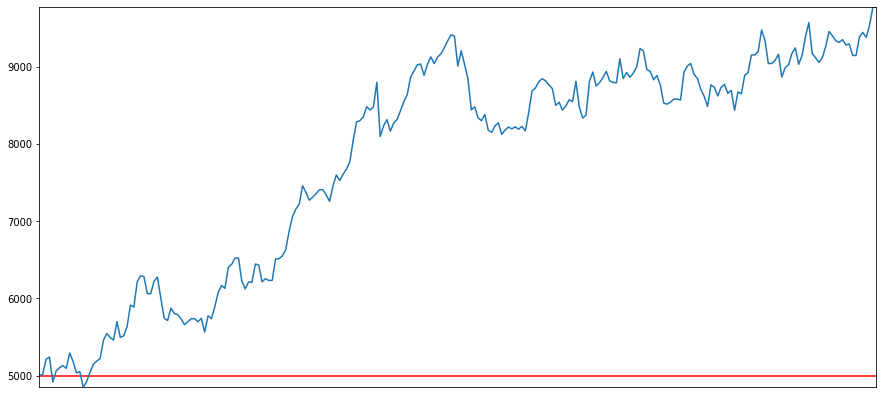

In [8]:
plt.figure(figsize=(15,7))
plt.axhline(y=5000, color='red')
plt.xticks([])
plt.autoscale(tight=True)
plt.plot(df_trend['Data'], df_trend['<BALANCE>'] )
plt.show();

## Curva de Capital da estratégia que opera fazendo pequenas operações scalper

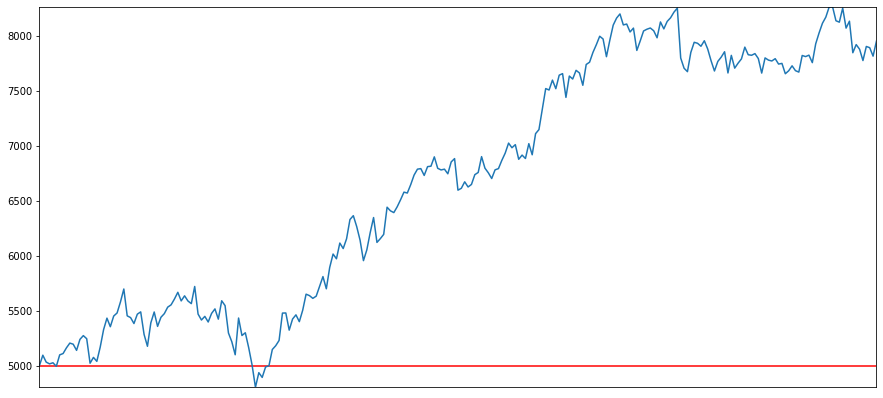

In [9]:
plt.figure(figsize=(15,7))
plt.axhline(y=5000, color='red')
plt.xticks([])
plt.autoscale(tight=True)
plt.plot(df_scalper['Data'], df_scalper['<BALANCE>'] )
plt.show();

##Obtendo dados estatísticos

Aqui é criada mais 2 colunas "Dif" e "Result". Em Dif é armazenada a variação diária, sem acumular o valor para o dia seguinte, simplesmente o resultado financeiro do dia. Result é uma coluna categórica: "1" para dia com saldo positivo e "0" para dia negativo.

Em seguida é calculado métricas importantes da estratégia: Dias positivos, dias negativos, taxa de acerto, drawdown absoluto e drawdown relativo ao capital acumulado.

In [11]:
data = [] 
result = []
topo = 5000
dd = 0
dd_rel = 0

data.append(0)
for i in range(len(df_ct)) : 
  dif = 0
  if (i != 0) :
    dif = df_ct.loc[i, '<BALANCE>'] - df_ct.loc[i-1, '<BALANCE>']
    data.append(dif)
  if (dif > 0) :
    result.append(1)
  else : 
    result.append(0)
  if (df_ct.loc[i, '<BALANCE>'] > topo) :
    topo = df_ct.loc[i, '<BALANCE>']
  if ((df_ct.loc[i, '<BALANCE>'] - topo) < dd ) :
    dd = (df_ct.loc[i, '<BALANCE>'] - topo)
    dd_rel = (dd * 100) / topo

df_ct['Dif'] = data
df_ct['Result'] = result
df_ct.head()



,<BALANCE>,Data,Dif,Result
0,5000.0,2019-01-01,0.0,0
1,4914.0,2019-01-02,-86.0,0
2,5230.0,2019-01-03,316.0,1
3,5438.0,2019-01-04,208.0,1
4,5393.0,2019-01-07,-45.0,0


In [12]:
print("Dias Positivos: "+ str(Counter(df_ct['Result'])[1]))
print("Dias Negativos: "+ str(Counter(df_ct['Result'])[0]))
print("Taxa de Acerto: "+('{:.2f}'.format((Counter(df_ct['Result'])[1] * 100) / (Counter(df_ct['Result'])[0] + Counter(df_ct['Result'])[1]) )+"%"))
print("Drawdown Máximo: "+str(dd))
print("Drawdown Relativo: "+('{:.2f}'.format(dd_rel))+"%")

Dias Positivos: 141
Dias Negativos: 108
Taxa de Acerto: 56.63%
Drawdown Máximo: -1296.0
Drawdown Relativo: -11.98%


In [13]:
data = [] 
result = []
topo = 5000
dd = 0
dd_rel = 0

data.append(0)
for i in range(len(df_trend)) : 
  dif = 0
  if (i != 0) :
    dif = df_trend.loc[i, '<BALANCE>'] - df_trend.loc[i-1, '<BALANCE>']
    data.append(dif)
  if (dif > 0) :
    result.append(1)
  else : 
    result.append(0)
  if (df_trend.loc[i, '<BALANCE>'] > topo) :
    topo = df_trend.loc[i, '<BALANCE>']
  if ((df_trend.loc[i, '<BALANCE>'] - topo) < dd ) :
    dd = (df_trend.loc[i, '<BALANCE>'] - topo)
    dd_rel = (dd * 100) / topo

df_trend['Dif'] = data
df_trend['Result'] = result
df_trend.head()

,<BALANCE>,Data,Dif,Result
0,5000.0,2019-01-01,0.0,0
1,5017.0,2019-01-02,17.0,1
2,5212.0,2019-01-03,195.0,1
3,5240.0,2019-01-04,28.0,1
4,4916.0,2019-01-07,-324.0,0


In [14]:
print("Dias Positivos: "+ str(Counter(df_trend['Result'])[1]))
print("Dias Negativos: "+ str(Counter(df_trend['Result'])[0]))
print("Taxa de Acerto: "+('{:.2f}'.format((Counter(df_trend['Result'])[1] * 100) / (Counter(df_trend['Result'])[0] + Counter(df_trend['Result'])[1]) )+"%"))
print("Drawdown Máximo: "+str(dd))
print("Drawdown Relativo: "+('{:.2f}'.format(dd_rel))+"%")

Dias Positivos: 142
Dias Negativos: 107
Taxa de Acerto: 57.03%
Drawdown Máximo: -1291.0
Drawdown Relativo: -13.71%


In [15]:
data = [] 
result = []
topo = 5000
dd = 0
dd_rel = 0

data.append(0)
for i in range(len(df_scalper)) : 
  dif = 0
  if (i != 0) :
    dif = df_scalper.loc[i, '<BALANCE>'] - df_scalper.loc[i-1, '<BALANCE>']
    data.append(dif)
  if (dif > 0) :
    result.append(1)
  else : 
    result.append(0)
  if (df_scalper.loc[i, '<BALANCE>'] > topo) :
    topo = df_scalper.loc[i, '<BALANCE>']
  if ((df_scalper.loc[i, '<BALANCE>'] - topo) < dd ) :
    dd = (df_scalper.loc[i, '<BALANCE>'] - topo)
    dd_rel = (dd * 100) / topo

df_scalper['Dif'] = data
df_scalper['Result'] = result
df_scalper.head()

,<BALANCE>,Data,Dif,Result
0,5000.0,2019-01-01,0.0,0
1,5094.0,2019-01-02,94.0,1
2,5031.0,2019-01-03,-63.0,0
3,5015.0,2019-01-04,-16.0,0
4,5025.0,2019-01-07,10.0,1


In [16]:
print("Dias Positivos: "+ str(Counter(df_scalper['Result'])[1]))
print("Dias Negativos: "+ str(Counter(df_scalper['Result'])[0]))
print("Taxa de Acerto: "+('{:.2f}'.format((Counter(df_scalper['Result'])[1] * 100) / (Counter(df_scalper['Result'])[0] + Counter(df_scalper['Result'])[1]) )+"%"))
print("Drawdown Máximo: "+str(dd))
print("Drawdown Relativo: "+('{:.2f}'.format(dd_rel))+"%")

Dias Positivos: 146
Dias Negativos: 103
Taxa de Acerto: 58.63%
Drawdown Máximo: -917.0
Drawdown Relativo: -16.03%


##Carregando dataframe do portfólio

Aqui é montado um novo dataframe consolidando o resultado das 3 estratégias.

As métricas calculadas anteriormente para cada estratégia é recalculada considerando o resultado do portfólio como um todo.

In [17]:
data = [] 
balances = []

df_portfolio = pd.DataFrame()

for i in range(len(df_ct)) : 
  data.append(df_ct.loc[i, "Data"])
  balances.append((df_ct.loc[i, "<BALANCE>"] + df_trend.loc[i, "<BALANCE>"] + df_scalper.loc[i, "<BALANCE>"]) - 15000)

dados = {'Data':data, 'Total':balances} 
  
df_portfolio = pd.DataFrame(dados) 
df_portfolio.head()

,Data,Total
0,2019-01-01,0.0
1,2019-01-02,25.0
2,2019-01-03,473.0
3,2019-01-04,693.0
4,2019-01-07,334.0


In [18]:
topo = 0
dd = 0
dd_rel = 0
result = []

for i in range(len(df_portfolio)) : 
  dif = 0
  if (i != 0) :
    dif = df_portfolio.loc[i, 'Total'] - df_portfolio.loc[i-1, 'Total']
  if (dif > 0) :
    result.append(1)
  else : 
    result.append(0)
  if (df_portfolio.loc[i, 'Total'] > topo) :
    topo = df_portfolio.loc[i, 'Total']
  if ((df_portfolio.loc[i, 'Total'] - topo) < dd ) :
    dd = (df_portfolio.loc[i, 'Total'] - topo)
    dd_rel = (dd * 100) / (topo+15000)

df_portfolio['Result'] = result

df_portfolio.head()

,Data,Total,Result
0,2019-01-01,0.0,0
1,2019-01-02,25.0,1
2,2019-01-03,473.0,1
3,2019-01-04,693.0,1
4,2019-01-07,334.0,0


In [19]:
print("Dias Positivos: "+ str(Counter(df_portfolio['Result'])[1]))
print("Dias Negativos: "+ str(Counter(df_portfolio['Result'])[0]))
print("Taxa de Acerto: "+('{:.2f}'.format((Counter(df_portfolio['Result'])[1] * 100) / (Counter(df_portfolio['Result'])[0] + Counter(df_portfolio['Result'])[1]) )+"%"))
print("Drawdown Máximo: "+str(dd))
print("Drawdown Relativo: "+('{:.2f}'.format(dd_rel))+"%")

Dias Positivos: 148
Dias Negativos: 101
Taxa de Acerto: 59.44%
Drawdown Máximo: -1322.0
Drawdown Relativo: -7.32%


##Curva de capital do portfólio

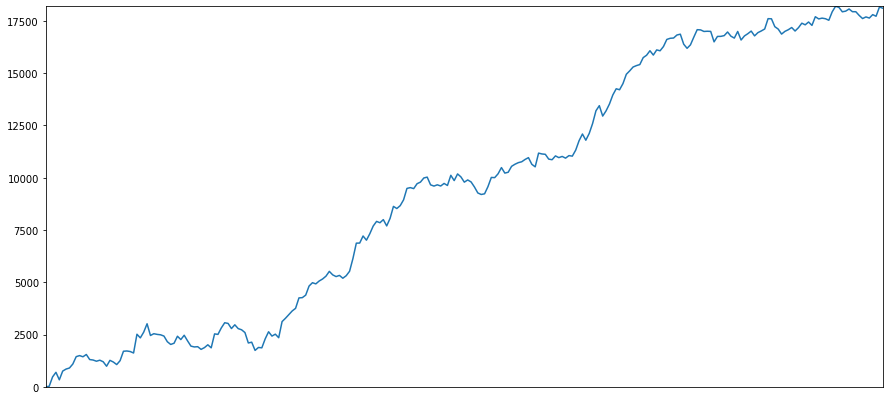

In [20]:
plt.figure(figsize=(15,7))
plt.xticks([])
plt.autoscale(tight=True)
plt.plot(df_portfolio['Data'], df_portfolio['Total'] )
plt.show();

In [0]:
df_portfolio.to_csv('df_portfolio.csv', index = False)

##Análise de correlação entre as estratégias

In [21]:
dfCorrel = pd.DataFrame(index=df_portfolio.index)  
dfCorrel['CONTRA TENDENCIA'] = df_ct['Dif']  
dfCorrel['TREND'] = df_trend.loc[:,'Dif']  
dfCorrel['SCALPER'] = df_scalper.loc[:,'Dif']  

dfCorrel.head()

,CONTRA TENDENCIA,TREND,SCALPER
0,0.0,0.0,0.0
1,-86.0,17.0,94.0
2,316.0,195.0,-63.0
3,208.0,28.0,-16.0
4,-45.0,-324.0,10.0


In [22]:
corr = dfCorrel.corr()
corr.style.background_gradient(cmap='coolwarm')

,CONTRA TENDENCIA,TREND,SCALPER
CONTRA TENDENCIA,1.000000,-0.131047,-0.341016
TREND,-0.131047,1.000000,0.035458
SCALPER,-0.341016,0.035458,1.000000


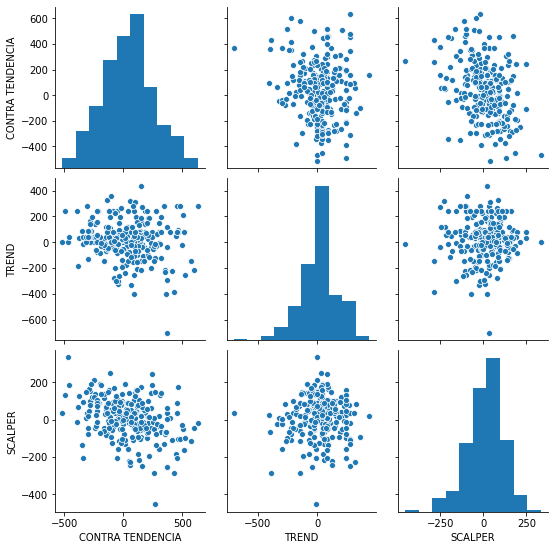

In [24]:
sns.pairplot(dfCorrel);

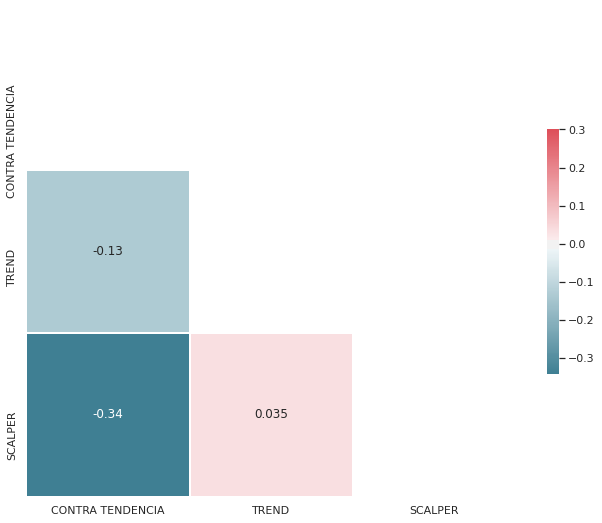

In [25]:
sns.set(style="white")

corr = dfCorrel.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

##Conclusão

Como pode-se observar no resultado consolidado do portfólio de estratégias, a curva de capital é muito mais suavizada. Isso foi refletido claramente nas métricas obtidas.

A taxa de acerto aumentou em relação a todas as estratégias isoladas e o drawdown absoluto se manteve no mesmo nível, porém o drawdown relativo ao capital acumulado diminuiu consideravelmente para 7%. Comprovando que a diversificação de estratégias (de preferência não correlacionadas) diminuem o risco geral do portfólio.